## Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog


## Project Motivation

### Context

Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## The Data

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).


## Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

## Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

## Software and libraries
- You need to be able to work in a Jupyter Notebook.
- The following packages (libraries) need to be installed. You can install these packages via conda or pip.
  - [Numpy](https://numpy.org/)
  - [Pandas](http://pandas.pydata.org/)
  - [matplotlib](http://matplotlib.org/)
  - [Requests](https://requests.readthedocs.io/en/master/user/quickstart/)
  - [Tweepy](http://docs.tweepy.org/en/latest/)
  - [JSON](https://docs.python.org/2/library/json.html)

## IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
from datetime import datetime
from tqdm import tqdm ,tqdm_notebook,tnrange
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Gathering Data for this Project

#### Gather each of the three pieces of data as described in a Jupyter Notebook

- The WeRateDogs Twitter archive.this file can be downloaded manually from link in Udacity course page


- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 


### a) Twitter archive Data

In [2]:
archive = pd.read_csv(r'E:\werate_dogs\twitter-archive-enhanced.csv')

### b) Tweet image prediction

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
request = requests.get(url)
with open (r'E:\werate_dogs\image_predictions.tsv','wb') as file:
    file.write(request.content)
image_preds = pd.read_csv(r'E:\werate_dogs\image_predictions.tsv', delimiter= '\t')

### c) Twitter complementry Data using API

I didn't have twitter account so i use tweet_json.txt from udacity class which is provided as a result for running .py file so i work directly with twwet_json.txt

In [4]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_key='hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
# For loop which will add each available tweet to a new line of tweet_json.txt

with open(r'E:\werate_dogs\tweet_json1.txt', 'w', encoding='utf8') as file:
    for tweet_id in tqdm(archive['tweet_id']):
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

In [7]:
tweets=[]

with open (r'E:\werate_dogs\tweet_json1.txt') as tweet_json:
    
    for line in tqdm(tweet_json):
        try:
            tweet = json.loads(line)
            tweets.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count']})
        except:
            continue
            
tweets_data = pd.DataFrame(tweets)

2323it [00:00, 11276.07it/s]



## DATA ASSESSING


#### After gathering each of the above pieces of data,i will  assess them visually and programmatically for quality and tidiness issues.

### 1. Data assessing for archive dataframe

In [8]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
archive.shape

(2356, 17)

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
list(archive.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### let's check if name column has a non-english name for dog

In [13]:
def isEnglish(s):
    return s.isascii()

archive['isEnglish'] = archive['name'].apply(lambda x: isEnglish(x))

In [14]:
archive['isEnglish'].value_counts()

True     2347
False       9
Name: isEnglish, dtype: int64

In [15]:
non_english = archive[['tweet_id','name']][archive['isEnglish'] ==False]


### 2. Data assessing for image_preds dataframe

In [16]:
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_preds.shape

(2075, 12)

In [18]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
list(image_preds.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### 13. Data assessing for tweets_data dataframe

In [21]:
tweets_data.head()

,favorite_count,retweet_count,tweet_id
0,36184,7703,892420643555336193
1,31214,5697,892177421306343426
2,23500,3777,891815181378084864
3,39485,7869,891689557279858688
4,37696,8479,891327558926688256


In [22]:
tweets_data.shape

(2323, 3)

In [23]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
favorite_count    2323 non-null int64
retweet_count     2323 non-null int64
tweet_id          2323 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


In [24]:
tweets_data.describe()

,favorite_count,retweet_count,tweet_id
count,2323.000000,2323.000000,2.323000e+03
mean,7559.167886,2703.382695,7.418515e+17
std,11745.759617,4575.749894,6.834235e+16
min,0.000000,1.000000,6.660209e+17
25%,1310.500000,546.000000,6.780222e+17
50%,3279.000000,1266.000000,7.175377e+17
75%,9261.000000,3142.000000,7.986846e+17
max,156180.000000,77773.000000,8.924206e+17


In [25]:
tweets_data.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

## After reviewing datasets and keypoints from course web page in addition to notes in project motivation i summraize quality and tidness issues as below;

# Quality issues


## archive Dataframe

1. Timestamp is object but it should be a datetime as it represent time on which tweet uploaded

2. retweeted_status_timestamp is object but it should be a datetime as it represent time on which tweet is retweeted

3. name column should be convert to dog_name as it may confuse reader as it is dog name or owner name 

4. Rating_denominator ranges from 0-10 but this cause issues when we calculate rating ratio as diving number by zero lead to    mathmatical issues this should be changed 

5. there is outliers in denominators as the maximum value is 177 

6. doggo, floofer, pupper, puppo columns contain 'None' value where NaN should be used.

7. there are 9 dogs with non-english names with the following tweet-id ,757354760399941633,720389942216527872,717047459982213120,694352839993344000,688547210804498433,686050296934563840,669371483794317312,668872652652679168,668528771708952576 so i will drop them as in this analysis i intersted in english dogs only 

8. Missing values in 'name'showing as 'None'



## image_preds Dataframe

1. change columns name to something informative for example p1 to first_predection  / p1_confd to first_prediction_confidence 



# Tideness 


1. img_num column in image_preds contain number for images in tweet i think this is un-useful info so i will drop this column

2. doggo, floofer, pupper, puppo columns are redundant as they describe same thing 
3. we need to join dataframes to make clear and complete picture for the entire information needed for the next step

# Cleaning stage 


### archive Dataframe

**keep only rows which has no replays or retweet**

In [26]:
replies = (~archive['in_reply_to_status_id'].isnull())

archive= archive[~replies]

retweets = (~archive['retweeted_status_id'].isnull())

archive = archive[~retweets]

**Timestamp is object but it should be a datetime as it represent time on which tweet uploaded**

In [27]:
archive['timestamp'] = pd.to_datetime(archive['timestamp'])

**retweeted_status_timestamp is object but it should be a datetime as it represent time on which tweet is retweeted**

In [28]:
archive['retweeted_status_timestamp'] = pd.to_datetime(archive['retweeted_status_timestamp'])

**'name' column should be convert to dog_name as it may confuse reader as it is dog name or owner name**

In [29]:
archive=archive.rename(columns={'name':'dog_name'})

**denominator issues**

In [30]:
archive['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [31]:
archive.loc[archive['rating_denominator']!=10,'rating_denominator'] = 10

**doggo, floofer, pupper, puppo columns contain 'None' value where NaN should be used.**

In [32]:
archive['doggo'].value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [33]:
archive[['doggo','floofer','pupper','puppo']] =archive[['doggo','floofer','pupper','puppo']].replace('None',np.nan)

**removing non-english dog names**

Here i will drop all 9 records with non-english dog names

In [34]:
archive.shape

(2097, 18)

In [35]:
archive = archive.drop(archive[archive['isEnglish'] == False].index)

In [36]:
archive.shape

(2088, 18)

**Missing values in 'dog_name'showing as 'None'**

In [37]:
archive['dog_name'].value_counts()

None       603
a           55
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Sadie        8
Lola         8
Winston      8
the          8
Daisy        7
Toby         7
Bella        6
Stanley      6
Koda         6
Bo           6
an           6
Oscar        6
Jax          6
Bailey       6
Louis        5
Leo          5
Rusty        5
Milo         5
Dave         5
Scout        5
Bentley      5
Buddy        5
          ... 
Lilly        1
BeBe         1
Anthony      1
Toffee       1
Katie        1
Rizzy        1
Anakin       1
Emma         1
Mutt         1
Todo         1
Noosh        1
Ulysses      1
Raphael      1
Cuddles      1
Cheesy       1
Miley        1
Tino         1
Chubbs       1
Rufio        1
Brady        1
Arya         1
Julio        1
Joey         1
Ole          1
Covach       1
Murphy       1
Augie        1
Stark        1
Binky        1
Yukon        1
Name: dog_name, Length: 948, dtype: int64

In [38]:
archive['dog_name']=archive['dog_name'].replace('None',np.nan)

In [39]:
archive['dog_name'].value_counts()

a          55
Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny       9
Tucker      9
the         8
Winston     8
Sadie       8
Lola        8
Daisy       7
Toby        7
Stanley     6
Jax         6
Bailey      6
Oscar       6
an          6
Bo          6
Bella       6
Koda        6
Dave        5
Scout       5
Milo        5
Louis       5
Bentley     5
Leo         5
Chester     5
Buddy       5
Rusty       5
           ..
Lilly       1
BeBe        1
Anthony     1
Toffee      1
Katie       1
Rizzy       1
Anakin      1
Emma        1
Mutt        1
Todo        1
Noosh       1
Ulysses     1
Raphael     1
Cuddles     1
Cheesy      1
Miley       1
Tino        1
Chubbs      1
Rufio       1
Brady       1
Arya        1
Julio       1
Joey        1
Ole         1
Covach      1
Murphy      1
Augie       1
Stark       1
Binky       1
Yukon       1
Name: dog_name, Length: 947, dtype: int64

**Remove rows where there are no images (expanded_urls).**

In [40]:
archive['expanded_urls'].isnull().sum()

3

In [41]:
archive= archive.dropna(subset=['expanded_urls'])

In [42]:
archive['expanded_urls'].isnull().sum()

0

**image_preds columns name changing**

In [43]:
columns_dict = {'p1':'first_predection',
 'p1_conf':'first_predection_confidence',
 'p2':'second_prediction',
 'p2_conf':'second_predection_confidence',
 'p3':'third_prediction',
 'p3_conf':'third_prediction_confidence'}

In [44]:
image_preds = image_preds.rename(columns=columns_dict)

In [45]:
image_preds = image_preds.drop(columns=['img_num'],axis=1)

In [46]:
archive['dog_style'] = archive['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

**Drop un-neccessary columns**

In [47]:
columns = ['doggo', 'floofer', 'pupper', 'puppo','in_reply_to_status_id', 'in_reply_to_user_id', 
           'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','isEnglish']

In [48]:
archive=archive.drop(columns=columns,axis=1)

**Change sources to more readable categories by replacing url and device type with only string define device type.**

In [49]:

# Remove url from sources
archive['source'] = archive['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive['source'] = archive['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
archive['source'] = archive['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive['source'] = archive['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [50]:
# Change datatype to category
archive['source'] = archive['source'].astype('category')

# Merging stage 

In [51]:
df1 = pd.merge(archive,image_preds,how='inner',on='tweet_id')

In [52]:
final_data = pd.merge(df1,tweets_data,how='inner',on='tweet_id')

In [53]:
final_data.shape

(1948, 21)

In [54]:
final_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_style,jpg_url,...,first_predection_confidence,p1_dog,second_prediction,second_predection_confidence,p2_dog,third_prediction,third_prediction_confidence,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36184,7703
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31214,5697
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23500,3777
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39485,7869
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37696,8479


In [58]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 22 columns):
tweet_id                        1948 non-null int64
timestamp                       1948 non-null datetime64[ns, UTC]
source                          1948 non-null category
text                            1948 non-null object
expanded_urls                   1948 non-null object
rating_numerator                1948 non-null int64
rating_denominator              1948 non-null int64
dog_name                        1426 non-null object
dog_style                       320 non-null object
jpg_url                         1948 non-null object
first_predection                1948 non-null object
first_predection_confidence     1948 non-null float64
p1_dog                          1948 non-null bool
second_prediction               1948 non-null object
second_predection_confidence    1948 non-null float64
p2_dog                          1948 non-null bool
third_prediction                1948

In [76]:
final_data.to_csv(r'E:\werate_dogs\twitter_archive_master.csv')

# Data exploration


### let's explore trends in number of tweets over time

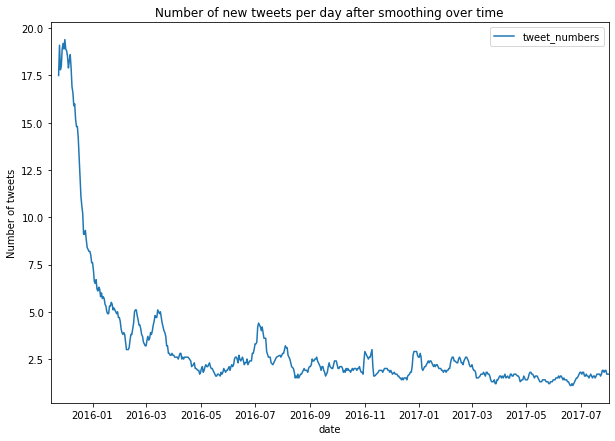

In [69]:

final_data['date'] = final_data['timestamp'].dt.date

final_data['tweet_numbers'] = 1
data = final_data[['date', 'tweet_numbers']].groupby(['date']).count() 

data['tweet_numbers'] = data['tweet_numbers'].rolling(window=10).mean()

data.plot(figsize=(10, 7),title='Number of new tweets per day after smoothing over time')
plt.ylabel('Number of tweets')

plt.show()

It's obvious that there is a degradation over time for total number of new tweets per day that tweeted or posted with this account this may be due to novelty of this topic or **trend** as in 2016 the account created and this idea is new new tweets per day decreased from 17.5 on average  in 01/2016 to almost 2 tweets per day in 07/2017

## Popular dog style

In [70]:
dog_style = final_data['dog_style'].value_counts()

In [71]:
dog_style

pupper     220
doggo       70
puppo       27
floofer      3
Name: dog_style, dtype: int64

Text(0.5, 1.0, 'popular dog style in our data')

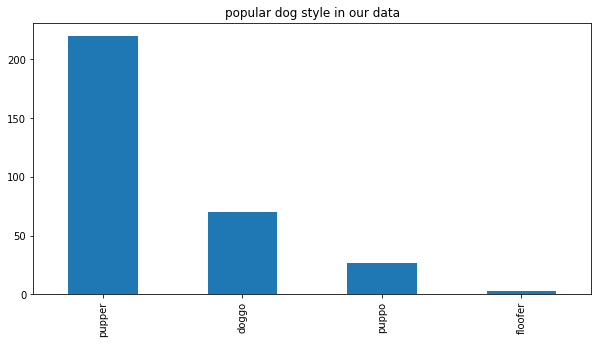

In [74]:
dog_style.plot(kind='bar',figsize=(10,5))
plt.title("popular dog style in our data")

# Most popular platform fo users they access weratedogs account

Text(0.5, 1.0, 'popular platform with which user access weratedogs account')

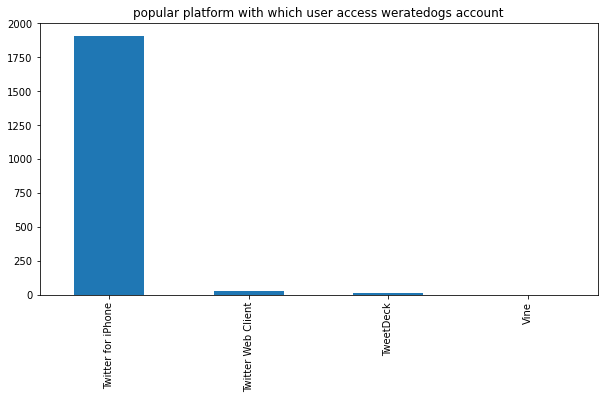

In [75]:
platform = final_data['source'].value_counts()
platform.plot(kind='bar',figsize=(10,5))
plt.title("popular platform with which user access weratedogs account")